See `threshold model.ipynb`

In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import random
from functions import *

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

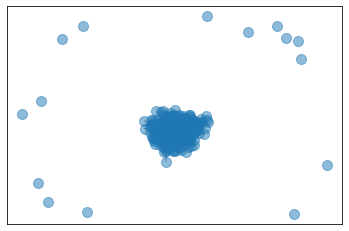

In [2]:
#Village 60. has the largest N
vilHH_adj_all = pd.read_csv(
    'banerjee12_data/datav4.0/Data/1. Network Data/Adjacency Matrices/adj_allVillageRelationships_HH_vilno_60.csv',
    header = None)
G = nx.from_pandas_adjacency(vilHH_adj_all) #interaction between the households
nx.draw_networkx(G, with_labels = False, alpha = 0.5, node_size = 100)

In [9]:
df = pd.read_csv('mass_data/less_than_1500_nodes/fb_friends.csv/edges.csv')
G = nx.from_pandas_edgelist(df, "# source", " target")

In [3]:
#edge cases. remove the small proportion of nodes that aren't connected to any others. W
#e want to comapare (across networks) the proportion of 'infected' nodes. But the disconnected nodes will never get 'infected', so we don't want these confounding the results. 
# remove = [node for node in G.nodes() if G.degree[node] == 0]
# G.remove_nodes_from(remove)
# nx.draw_networkx(G, with_labels = False, alpha = 0.5, node_size = 100)

In [12]:
Frhos = get_rhos(G, q = 0.5, tmax = 20, rep = 20, seed_method = 'friend')
friend_props = Frhos.mean(axis=0) #take the mean over each col (time)
friend_stds = Frhos.std(axis = 0) #for errorbars
print(friend_props)
friend_stds

[0.2       0.2270625 0.242375  0.2516875 0.25675   0.2616875 0.2648125
 0.2683125 0.2713125 0.274     0.2756875 0.2779375 0.2808125 0.2853125
 0.2909375 0.2980625 0.305125  0.3105625 0.3154375 0.321625  0.328375 ]


array([2.77555756e-17, 7.95765159e-03, 1.36639352e-02, 1.63136973e-02,
       1.90410740e-02, 2.15901996e-02, 2.27255191e-02, 2.61075749e-02,
       2.95367224e-02, 3.39130322e-02, 3.76942365e-02, 4.25005055e-02,
       5.08801825e-02, 6.42673554e-02, 8.32474427e-02, 1.06839157e-01,
       1.28382911e-01, 1.42394959e-01, 1.53886766e-01, 1.66311126e-01,
       1.81984761e-01])

In [13]:
#pair
Prhos = get_rhos(G, q = 0.5, tmax = 20, rep = 20, seed_method = 'pair')
pair_props = Prhos.mean(axis=0) 
pair_stds = Prhos.std(axis = 0) 

#random
Rrhos = get_rhos(G, q = 0.5, tmax = 20, rep = 20, seed_method = 'random')
rand_props = Rrhos.mean(axis=0) 
rand_stds = Rrhos.std(axis = 0) 

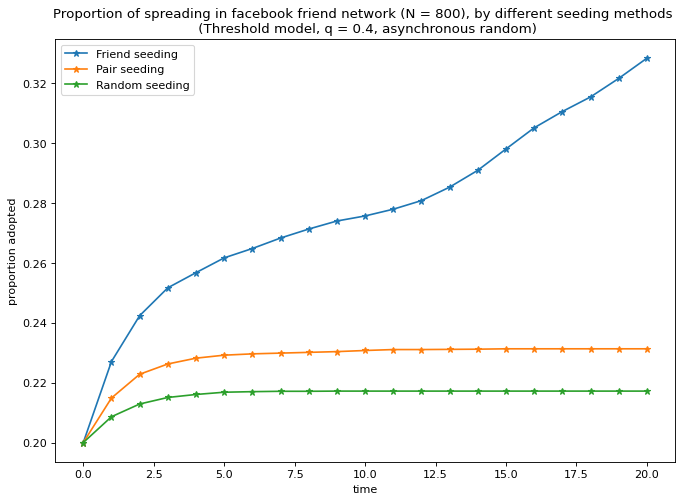

In [15]:
plt.figure(figsize=(10, 7), dpi=80)
plt.plot(np.arange(0, len(friend_props)), friend_props,"-*",label=r"Friend seeding")
#plt.errorbar(np.arange(0, len(friend_props)), friend_props, yerr = friend_stds, fmt = "-*", label=r"Friend seeding")

plt.plot(np.arange(0, len(pair_props)), pair_props,"-*",label=r"Pair seeding")
plt.plot(np.arange(0, len(rand_props)), rand_props,"-*",label=r"Random seeding")
#plt.errorbar(np.arange(0, len(pair_props)), pair_props, yerr = pair_stds, fmt = "-*", label=r"Pair seeding")
#plt.errorbar(np.arange(0, len(rand_props)), rand_props, yerr = rand_stds, fmt = "-*", label=r"Random seeding")

plt.xlabel("time")
plt.ylabel("proportion adopted")
plt.title("Proportion of spreading in facebook friend network (N = 800), by different seeding methods \n (Threshold model, q = 0.4, asynchronous random)")
plt.legend()
plt.show()

### As we saw in `poisson and small world`, the Indian villages follow scale free network characteristics. 

Hence, let's fit a Barabassi-Albert model 'representative' of the 43 villages. We can then see how the theoretical calculations compare to observed.

In [75]:
## microfinance was only spread to  43 of the 77 villages. which 43?
cross_sec = pd.read_stata("banerjee12_data/datav4.0/Stata Replication/data/cross_sectional.dta")
villages = [str(int(vil)) for vil in cross_sec['village']]
print(villages)

['1', '2', '3', '4', '6', '9', '12', '15', '19', '20', '21', '23', '24', '25', '29', '31', '32', '33', '36', '39', '42', '43', '45', '46', '47', '48', '50', '51', '52', '55', '57', '59', '60', '62', '64', '65', '67', '68', '70', '71', '72', '73', '75']


In [76]:
#what is <z> OVER all villages?

zs = []
Ns = []

for vil in villages:
    
    path = 'banerjee12_data/datav4.0/Data/1. Network Data/Adjacency Matrices/adj_allVillageRelationships_HH_vilno_{}.csv'.format(vil)
    adj_mat = pd.read_csv(path,header = None)
    current_g = nx.from_pandas_adjacency(adj_mat)
    current_zavg = np.mean(list(dict(current_g.degree).values()))
    Ns.append(current_g.number_of_nodes())
    zs.append(current_zavg)
    print("village {}, avg_degree {}, N = {}".format(vil, current_zavg, current_g.number_of_nodes()))
    
print("avg degree over all 43 villages:", np.mean(zs))

village 1, avg_degree 9.538461538461538, N = 182
village 2, avg_degree 6.912820512820513, N = 195
village 3, avg_degree 8.863013698630137, N = 292
village 4, avg_degree 7.807531380753138, N = 239
village 6, avg_degree 6.4035087719298245, N = 114
village 9, avg_degree 10.028985507246377, N = 207
village 12, avg_degree 8.034285714285714, N = 175
village 15, avg_degree 10.385964912280702, N = 171
village 19, avg_degree 9.0, N = 204
village 20, avg_degree 6.128205128205129, N = 156
village 21, avg_degree 9.425742574257425, N = 202
village 23, avg_degree 8.377952755905511, N = 254
village 24, avg_degree 9.889570552147239, N = 163
village 25, avg_degree 9.222222222222221, N = 252
village 29, avg_degree 7.76551724137931, N = 290
village 31, avg_degree 7.856209150326797, N = 153
village 32, avg_degree 9.717842323651452, N = 241
village 33, avg_degree 7.431372549019608, N = 204
village 36, avg_degree 10.352941176470589, N = 289
village 39, avg_degree 8.383275261324043, N = 287
village 42, avg_d

see `tutorial 5`. want to fit the preferential Attachment model $G_{ba}(m,N)$

- pick $N$ to be the average size of the networks

- What is the value of $m$ in the preferential attachment model that one should choose to generate random graphs suitable for comparison with a network of average degree $\langle z \rangle$?

$$m \approx \frac{\langle z \rangle}{2}$$

In [128]:
#For now, fit to Village 60
N = 356 #round(np.mean(Ns))

z_avg = 7.977528089887641#np.mean(zs)
m = round(z_avg/2)

print(N,m)

356 4


In [129]:
Gba = nx.barabasi_albert_graph(N,m)

the critical q threshold, `tut11-1`

In [130]:
def degreesNodes(G):
    "Returns list of degrees and nodes"
    dictDegree=G.degree()
    degrees=[]
    nodes=[]

    for n in G.nodes():
        degrees.append(dictDegree[n])
        nodes.append(n)
    return np.array(degrees),np.array(nodes)

def nonVulnerable(ns,dg,q):
    "Returns nodes from list ns with degree ds that are not vulnerable at level q"
    sus=[]
    TorF = dg > 1/q
    for n in range(N):
        if TorF[n]:
            sus.append(n)
    return(sus)

def netProperties(G):
    if G.number_of_nodes() == 0:
        return(0,0)
    largest_cc=max(nx.connected_components(G),key=len)
    Gcc=G.subgraph(largest_cc)
    Ncc=nx.number_of_nodes(Gcc)
    deg,nodes = degreesNodes(G)
    
    if (np.average(deg*deg) == 0): #if there is only one vulnerable node as the subgraph, it will have degree 0. => fluctuation zero. 
        #do this to avoid division by zero.
        return (0,len(Gcc))
    
    return(np.average(deg*deg)/np.average(deg), len(Gcc))
    

In [134]:
qs = np.linspace(0.02, 0.32)

GbaS_results = dict.fromkeys(qs)

for q in qs:

    DGba,NSba =degreesNodes(Gba)
    Sba = nonVulnerable(NSba,DGba,q)

    GbaS = Gba.copy()
    for n in Sba:
        nx.Graph.remove_node(GbaS,n)

    GbaS_results[q] = netProperties(GbaS)


In [135]:
GbaS_results

{0.02: (11.59185303514377, 353),
 0.026122448979591838: (10.966969446738231, 352),
 0.03224489795918367: (9.837522441651705, 349),
 0.03836734693877551: (7.948583420776496, 343),
 0.044489795918367346: (6.98728323699422, 339),
 0.05061224489795918: (5.837653478854024, 328),
 0.05673469387755102: (5.606534090909092, 326),
 0.06285714285714286: (5.425000000000001, 324),
 0.06897959183673469: (5.26219512195122, 321),
 0.07510204081632653: (5.124409448818898, 319),
 0.08122448979591837: (4.7495682210708114, 311),
 0.08734693877551021: (4.378167641325536, 294),
 0.09346938775510204: (3.8267898383371826, 278),
 0.09959183673469388: (3.8267898383371826, 278),
 0.10571428571428572: (3.440000000000001, 261),
 0.11183673469387755: (2.8592592592592596, 205),
 0.11795918367346939: (2.8592592592592596, 205),
 0.12408163265306123: (2.8592592592592596, 205),
 0.13020408163265304: (2.4691943127962084, 164),
 0.1363265306122449: (2.4691943127962084, 164),
 0.14244897959183672: (2.4691943127962084, 164)

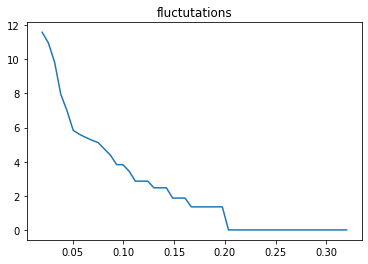

In [136]:
##barabasi_albert_graph
flucs = [v[0] for v in GbaS_results.values()]
Sn = [v[1] for v in GbaS_results.values()]

plt.title('fluctutations')
plt.plot(qs, flucs, label = 'BA')


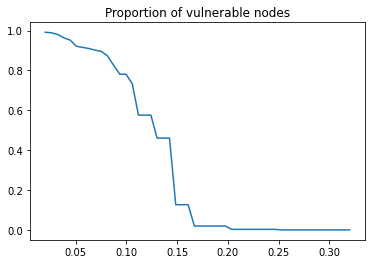

In [137]:
plt.title('Proportion of vulnerable nodes')
plt.plot(qs, np.array(Sn)/N, label = 'BA')

0.0056179775280898875

In [ ]:
##TRY to match the theoretical q threshold?

qs = np.linspace(0.2, 0.9, num = 10)
R_finalprop = []#final proportions
P_finalprop = []
F_finalprop = []

p = 2/356 #seeding proportion. CHOSEN TO SELECT ONLY TWO SEEDS

for q in qs:
    print(q)
    #random
    Rrhos = get_rhos(G, q = q, tmax = 20, rep = 100, seed_method = 'random', p = p)
    rand_props = Rrhos.mean(axis=0) 
    #rand_stds = Rrhos.std(axis = 0) 
    R_finalprop.append(rand_props[-1]) #how do the final proportions chenge with q?
    
    #pair
    Prhos = get_rhos(G, q = q, tmax = 20, rep = 100, seed_method = 'pair', p = p)
    pair_props = Prhos.mean(axis=0) 
    #pair_stds = Prhos.std(axis = 0) 
    P_finalprop.append(pair_props[-1])
    
    #friend
    Frhos = get_rhos(G, q = q, tmax = 20, rep = 100, seed_method = 'friend', p = p)
    friend_props = Frhos.mean(axis=0) #take the mean over each col (time)
    #friend_stds = Frhos.std(axis = 0) #for errorbars
    F_finalprop.append(friend_props[-1])

So theoretically, the critical q threshold seems to be around 0.15. **Theoretical is wayyy off - maybe I fitted BA wrongly**. 

compare against empirical. We want to see if the seeding methods affect the critical q threshold. I.e. with friend seeding for example, we expect that the threshold may be higher, since we are effectivley targeting the 'most obstinate' blockers (friend seeding is highly correlated with centrality measures).

Random seeding should have a critical q that aligns the most with the theoretical ones we calcualted in class (since the class calculations assumes random seeds). 

**See below: Friend seeding is most robust to threshold q!!!**

In [111]:
##TAKES DAMN LONG

qs = np.linspace(0.2, 0.9, num = 10)
R_finalprop = []#final proportions
P_finalprop = []
F_finalprop = []

p = 0.1 #seeding proportion

for q in qs:
    print(q)
    #random
    Rrhos = get_rhos(G, q = q, tmax = 20, rep = 100, seed_method = 'random', p = p)
    rand_props = Rrhos.mean(axis=0) 
    #rand_stds = Rrhos.std(axis = 0) 
    R_finalprop.append(rand_props[-1]) #how do the final proportions chenge with q?
    
    #pair
    Prhos = get_rhos(G, q = q, tmax = 20, rep = 100, seed_method = 'pair', p = p)
    pair_props = Prhos.mean(axis=0) 
    #pair_stds = Prhos.std(axis = 0) 
    P_finalprop.append(pair_props[-1])
    
    #friend
    Frhos = get_rhos(G, q = q, tmax = 20, rep = 100, seed_method = 'friend', p = p)
    friend_props = Frhos.mean(axis=0) #take the mean over each col (time)
    #friend_stds = Frhos.std(axis = 0) #for errorbars
    F_finalprop.append(friend_props[-1])

0.2
0.2777777777777778
0.35555555555555557
0.43333333333333335
0.5111111111111111
0.5888888888888889
0.6666666666666667
0.7444444444444445
0.8222222222222222
0.9


In [113]:
p = 0.1

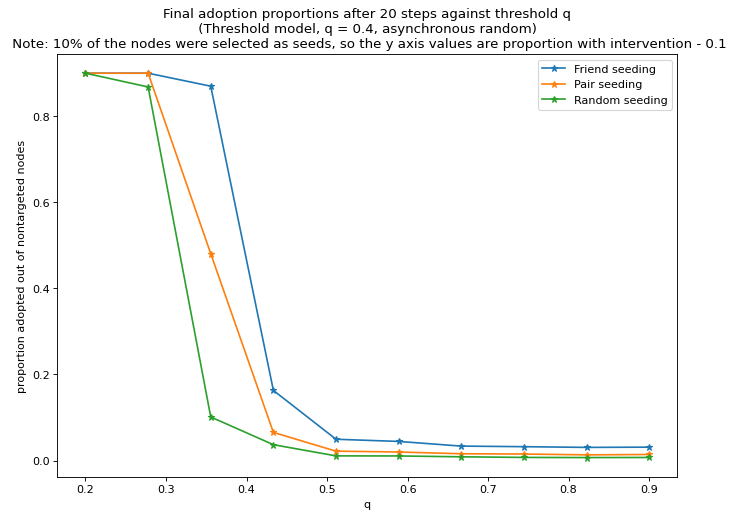

In [116]:
plt.figure(figsize=(10, 7), dpi=80)
plt.plot(qs, np.array(F_finalprop) - p,
         "-*",label=r"Friend seeding")
#plt.errorbar(np.arange(0, len(friend_props)), friend_props, yerr = friend_stds, fmt = "-*", label=r"Friend seeding")

plt.plot(qs, np.array(P_finalprop) - p,
         "-*",label=r"Pair seeding")
plt.plot(qs, np.array(R_finalprop) - p,
         "-*",label=r"Random seeding")
#plt.errorbar(np.arange(0, len(pair_props)), pair_props, yerr = pair_stds, fmt = "-*", label=r"Pair seeding")
#plt.errorbar(np.arange(0, len(rand_props)), rand_props, yerr = rand_stds, fmt = "-*", label=r"Random seeding")

plt.xlabel("q")
plt.ylabel("proportion adopted out of nontargeted nodes")
plt.title("Final adoption proportions after 20 steps against threshold q\n (Threshold model, q = 0.4, asynchronous random) \n Note: 10% of the nodes were selected as seeds, so the y axis values are proportion with intervention - 0.1")
plt.legend()
plt.show()